## Q6: Conway's Game of Life

**Exercise**: Code up Conway's Game of Life using numpy 

The Game of Life is a cellular automaton devised by mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The Game of Life is *really* (really, really) cool.

There are just four extremely simple rules, and these result in an immense richness of behaviour and complexity.

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [3]:
import numpy as np
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
np.set_printoptions(threshold = np.inf)

In [5]:
# --- Setting initial configuration ---

def initial_config(N):
    
    grid = np.zeros((N,N))
    mid = int(N/2)-10
    grid[mid,mid] = 1
    grid[mid,mid-1] = 1
    grid[mid-1,mid] = 1
    grid[mid-2,mid] = 1
    grid[mid-1,mid-2] = 1

    #grid[mid-1, mid+1] = 1
    #grid[mid-1, mid-1] = 1
    #grid[mid, mid]     = 1
    #grid[mid+1, mid]   = 1
    
    return grid

In [7]:
# --- Check the rules ---

def new_matrix(grid,N):
    
    grid_count = np.zeros((N,N))
    grid_new = np.zeros((N,N))
    
    grid_count[:,:-1] += grid[:,1:]
    grid_count[:,1:] += grid[:,:-1]
    grid_count[:-1,:] += grid[1:,:]
    grid_count[1:,:] += grid[:-1,:]
    grid_count[:-1,:-1] += grid[1:,1:]
    grid_count[:-1,1:] += grid[1:,:-1]
    grid_count[1:,:-1] += grid[:-1,1:]
    grid_count[1:,1:] += grid[:-1,:-1]
    
    grid_new[np.logical_and(grid == 0, grid_count == 3)] = 1
    grid_new[np.logical_and(grid == 1, grid_count < 2)] = 0
    grid_new[np.logical_and(grid == 1, grid_count > 3)] = 0
    grid_new[np.logical_and(grid == 1, grid_count == 3)] = 1
    grid_new[np.logical_and(grid == 1, grid_count == 2)] = 1
    
    return grid_new

In [9]:
iterations = int(100)
N = 50
grid = initial_config(N)
#print(grid)

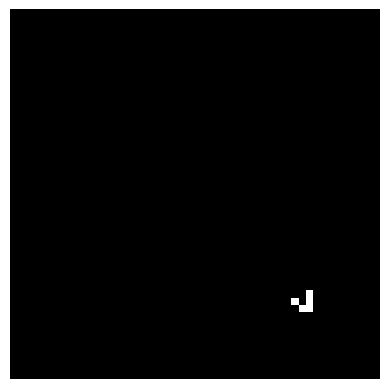

In [11]:
# --- Play ---

for i in range(iterations):
    clear_output(wait=True)
    grid_new = new_matrix(grid,N)
    grid = grid_new
    #print(grid)
    plt.imshow(grid, cmap='grey')
    plt.axis('off')
    plt.gca().set_aspect('equal')
    plt.show()
    time.sleep(0.3)